# 2435. Paths in Matrix Whose Sum Is Divisible by K

You are given a 0-indexed m x n integer matrix grid and an integer k. You are currently at position (0, 0) and you want to reach position (m - 1, n - 1) moving only down or right.

Return the number of paths where the sum of the elements on the path is divisible by k. Since the answer may be very large, return it modulo 109 + 7.

 

Example 1:

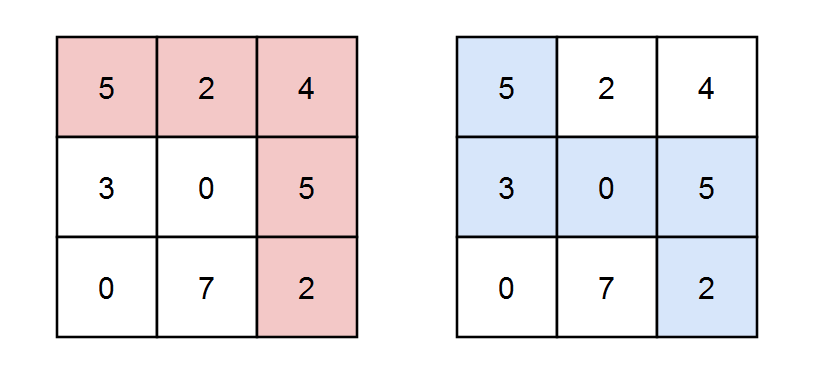


Input: grid = [[5,2,4],[3,0,5],[0,7,2]], k = 3
Output: 2
Explanation: There are two paths where the sum of the elements on the path is divisible by k.
The first path highlighted in red has a sum of 5 + 2 + 4 + 5 + 2 = 18 which is divisible by 3.
The second path highlighted in blue has a sum of 5 + 3 + 0 + 5 + 2 = 15 which is divisible by 3.

Example 2:

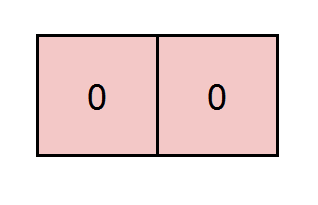

Input: grid = [[0,0]], k = 5
Output: 1
Explanation: The path highlighted in red has a sum of 0 + 0 = 0 which is divisible by 5.

Example 3:

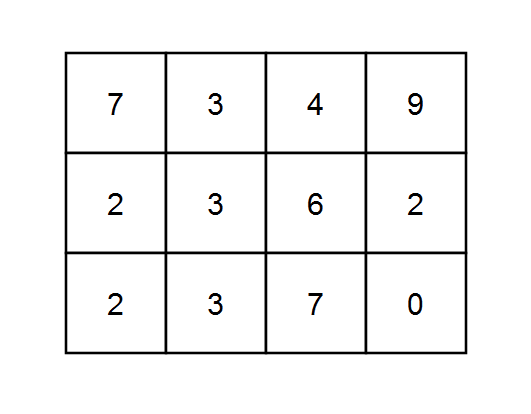

Input: grid = [[7,3,4,9],[2,3,6,2],[2,3,7,0]], k = 1
Output: 10
Explanation: Every integer is divisible by 1 so the sum of the elements on every possible path is divisible by k.
 

Constraints:

m == grid.length
n == grid[i].length
1 <= m, n <= 5 * 104
1 <= m * n <= 5 * 104
0 <= grid[i][j] <= 100
1 <= k <= 50

## Solution: DFS with memoisation

1. Instead of passing the entire sum which may be huge, pass the remainder instead.
2. There are 2 ways to reach a cell, move right or move down

In [ ]:
grid = [[5,2,4],[3,0,5],[0,7,2]]; k = 3
memo={}
MOD=10**9+7
r,c=len(grid),len(grid[0])
def DFS(i,j,rem): #row idx, col idx, remainder
    #Base Case:
    if i==r-1 and j==c-1: #Reaches the end of the grid
        if (rem+grid[i][j])%k==0:
            return 1
        return 0
    #Out of Bounds Case
    if i==r or j==c:
        return 0
    #If already in cache
    if (i,j,rem) in memo:
        return memo[(i,j,rem)]
    #Explore right and down
    memo[(i,j,rem)]=DFS(i+1,j,(rem+grid[i][j])%k)+DFS(i,j+1,(rem+grid[i][j])%k)

    return memo[(i,j,rem)]

DFS(0,0,0)%MOD

2

Memory Limit Exceeded

## Improved Solution: For Caching, instead of disctionary, use a 3d list.

Why does it work?

1. The Cost of the "Key" (Tuple vs. Index)Dictionary (memo[(i, j, rem)] = val):To store a value in a dictionary, Python must store the Key itself. In your case, the key is a Tuple (i, j, rem).Every time you save a state, Python creates a tuple object.This tuple has a memory overhead (header, length, and pointers to the 3 integers).Result: You aren't just storing the answer; you are storing millions of tuple objects just to label the answers.3D List (memo[i][j][rem] = val):The "keys" (i, j, rem) are implicit. They are not stored.They are simply mathematical offsets. Python calculates the memory address based on the index: Base_Address + (i * row_size) + (j * col_size) + rem.Result: Zero memory is spent on storing the coordinates.

2. The Container Structure (Hash Table vs. Contiguous Block)Dictionary (Hash Table):A Python dictionary is a Hash Table. To make lookups fast ($O(1)$), a hash table must be larger than the data it holds (usually keeping ~1/3rd of the slots empty) to avoid "hash collisions."It stores: The Hash of the key + A pointer to the Key + A pointer to the Value.Growth: When a dictionary fills up, Python doubles its size, leading to sudden spikes in memory usage and large chunks of unused allocated memory.List (Array):A Python list (when pre-allocated like [[...]]) is a compact array of pointers.It stores: Just the pointer to the Value.There is no "empty space" reserved for collision handling. It is exactly the size you defined ($N \times M \times K$).

When should you use a Dictionary?

Use a dictionary only when the solution space is extremely sparse. For example, if your grid was $1,000,000 \times 1,000,000$ but you only ever visited 50 specific cells, a Dictionary is better because allocating a massive array for 50 items is wasteful.However, in your problem, you are traversing almost the entire grid, so the solution is dense, making the Array/List the superior choice.

In [2]:
grid = [[5,2,4],[3,0,5],[0,7,2]]; k = 3

MOD=10**9+7
r,c=len(grid),len(grid[0])
memo= [[[-1]*k for _ in range(c)] for _ in range(r)] #index: row,col,remainder, value: no. of ways (-1 means cell is not visited)
def DFS(i,j,rem): #row idx, col idx, remainder
    #Base Case:
    if i==r-1 and j==c-1: #Reaches the end of the grid
        if (rem+grid[i][j])%k==0:
            return 1
        return 0
    #Out of Bounds Case
    if i==r or j==c:
        return 0
    #If already in cache
    if memo[i][j][rem]>-1: #If cell is visited
        return memo[i][j][rem]
    #Explore right and down
    memo[i][j][rem]=DFS(i+1,j,(rem+grid[i][j])%k)+DFS(i,j+1,(rem+grid[i][j])%k)

    return memo[i][j][rem]

DFS(0,0,0)%MOD

2

### Accepted